In [586]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.mixture as skm
import matplotlib.pyplot as plt
import nltk as nl
import collections as col
nl.download('punkt')
nl.download('stopwords')
nl.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### 1. Tokenization, stop word removal, lemmatization and stemming, vectorization ####

In [587]:
#
# 1. Tokenize the data & 2. remove the stopwords: aka convert the rows of words into tokens
#

# Note: -On first attempt using nltk tokenize was not the move. Doing this primatively with arrays behaves better.
#  -If I remove special characters it seems that the scatterplot graphs flip with slightly different results. I'm unsure on whether or not its required for this NLP use (see below).

df = pd.read_csv("bbc-news-data-modified.csv")
df['tokenized'] = df['title'] + ' ' + df['content']
df['tokenized'] = df['tokenized'].str.lower()
#df['tokenized'] = df['tokenized'].str.replace('[^\w\s]', '', regex=True)

tokenized = df['tokenized'].str.split()

stopwords_to_remove = nl.corpus.stopwords.words('english')
stopwords_to_remove = set(stopwords_to_remove)
#print(stopwords_to_remove)
tokenized = tokenized.apply(lambda row: [word for word in row if word not in stopwords_to_remove])
tokenized.head(10)

0    [ad, sales, boost, time, warner, profit, quart...
1    [dollar, gains, greenspan, speech, dollar, hit...
2    [yukos, unit, buyer, faces, loan, claim, owner...
3    [high, fuel, prices, hit, ba's, profits, briti...
4    [pernod, takeover, talk, lifts, domecq, shares...
5    [japan, narrowly, escapes, recession, japan's,...
6    [jobs, growth, still, slow, us, us, created, f...
7    [india, calls, fair, trade, rules, india,, att...
8    [ethiopia's, crop, production, 24%, ethiopia, ...
9    [court, rejects, $280bn, tobacco, case, us, go...
Name: tokenized, dtype: object

In [588]:
# 3. Perform lemmatization and stemming on all of the word tokens in the list
nlStemming = nl.stem.PorterStemmer()
nlLemmatization = nl.stem.WordNetLemmatizer()

def convert_to_base_word(sentence):
    return [nlStemming.stem(nlLemmatization.lemmatize(word)) for word in sentence]

tokenized = tokenized.apply(convert_to_base_word)
tokenized.head(10)

0    [ad, sale, boost, time, warner, profit, quarte...
1    [dollar, gain, greenspan, speech, dollar, hit,...
2    [yuko, unit, buyer, face, loan, claim, owner, ...
3    [high, fuel, price, hit, ba', profit, british,...
4    [pernod, takeov, talk, lift, domecq, share, uk...
5    [japan, narrowli, escap, recess, japan', econo...
6    [job, growth, still, slow, u, u, creat, fewer,...
7    [india, call, fair, trade, rule, india,, atten...
8    [ethiopia', crop, product, 24%, ethiopia, prod...
9    [court, reject, $280bn, tobacco, case, u, gove...
Name: tokenized, dtype: object

In [589]:
# 4. Perform vectorization
row_article = [' '.join(row) for row in tokenized]
vectorizer = sk.feature_extraction.text.TfidfVectorizer(max_features=5000)
tfidf_feature_matrix = vectorizer.fit_transform(row_article)

features = pd.DataFrame(data= tfidf_feature_matrix.toarray(), columns= vectorizer.get_feature_names_out())

features.head(10)

,000,000m,05,10,100,100m,102,104,10bn,10th,...,yugansk,yuganskneftega,yuganskneftegas,yuko,yukos,yushchenko,zealand,zero,zone,zurich
0,0.027348,0.0,0.0,0.028674,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.439632,0.0,0.0,0.265087,0.132543,0.0,0.0,0.0,0.0,0.0
3,0.022699,0.0,0.0,0.023800,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.047573,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.147393,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.064221,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


#### 2. Clustering implementations: ####

##### K-means: #####

<Figure size 1000x480 with 0 Axes>

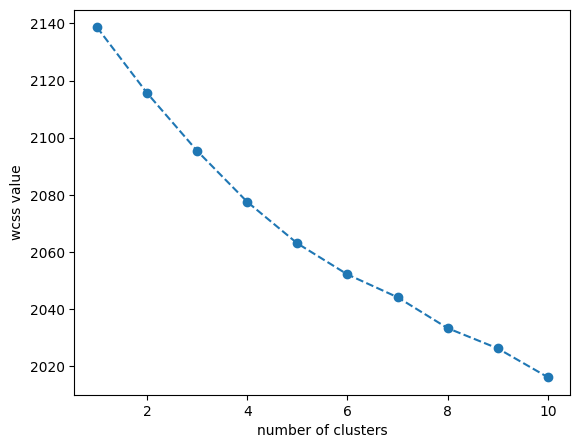

In [590]:
#
# 4. Within Cluster Sum of Squares to find the ideal number of clusters
#

# kmeans++, 300 iterations per run, 10 initial centroids, random state of 0 

def wcss_ideal_clusters(features, k=10):
    number_of_clusters = []
    distances = []

    for numClusters in range(1, k+1):
        kmeans = sk.cluster.KMeans(n_clusters = numClusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(features)

        distances.append(kmeans.inertia_)
        number_of_clusters.append(numClusters)

    plt.figure().set_figwidth(10)
    plt.figure().set_figheight(5)
    plt.plot(number_of_clusters, distances, 'o--')
    plt.ylabel('wcss value')
    plt.xlabel('number of clusters')

    return

#PCA_reduction = sk.decomposition.PCA(n_components=2)
#reduced_features = PCA_reduction.fit_transform(text)
wcss_ideal_clusters(features) # --> using the dataframe text data


From the above WCSS elbow there is no definite elbow when using the text features (the same one used to train the clustering methods). I believe there could be an elbow at c = 4 or 5, however its hard to define.

In [591]:
#
# Create a 5 k-means clusters
#

kmeans_clusters = sk.cluster.KMeans(n_clusters=5, random_state=0)
kmeans_clusters = kmeans_clusters.fit(features)


#
# 1. Report number of articles in each of the 5 clusters
#

num_of_articles_kmeans = col.Counter(kmeans_clusters.labels_)
#print(type(num_of_articles_kmeans))

for cluster in num_of_articles_kmeans.items():
    print("Cluster #: {} || Number of Articles: {}".format(cluster[0], cluster[1]))

C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster #: 2 || Number of Articles: 786
Cluster #: 1 || Number of Articles: 376
Cluster #: 0 || Number of Articles: 238
Cluster #: 4 || Number of Articles: 500
Cluster #: 3 || Number of Articles: 325


<Figure size 1000x480 with 0 Axes>

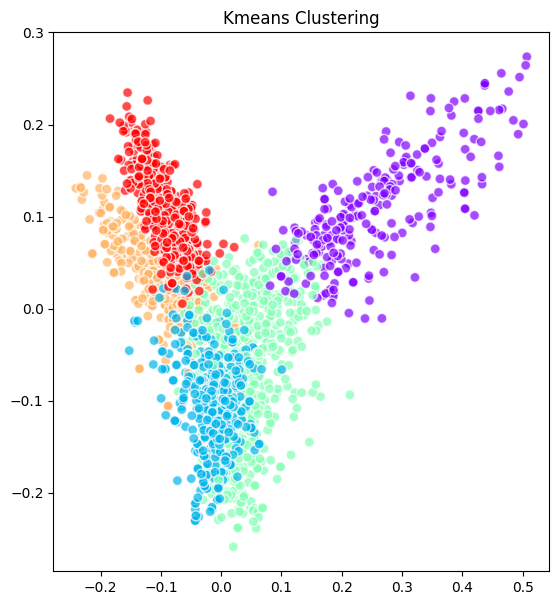

In [592]:
#
# 2. Scatterplot the k-means model after dimensionality reduction (PCA - Principal Component Analysis)
#

principal_component_analysis = sk.decomposition.PCA(n_components=2)
PCA_reduction = principal_component_analysis.fit_transform(features)

plt.figure().set_figwidth(10)
plt.figure().set_figheight(7)
plt.scatter(PCA_reduction[:,0], PCA_reduction[:,1], c=kmeans_clusters.labels_, cmap='rainbow', alpha=0.7, edgecolors='w', s=50)
plt.title("Kmeans Clustering")
plt.show()

##### DBSCAN: #####

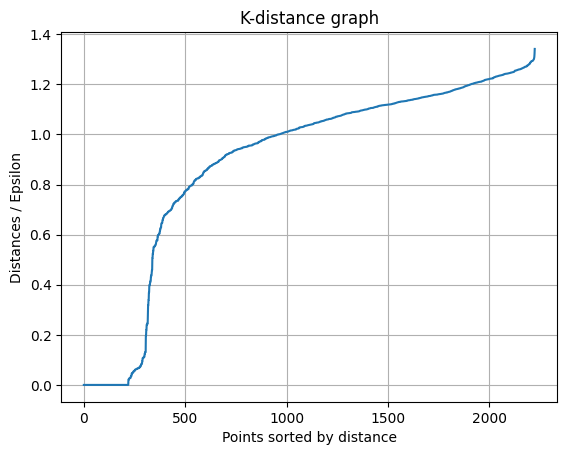

In [593]:
#
# 3. K-distance graph to estimate eps ("use this value for clustering")
#

# assume: minpoints = 2, plot the distance of every point to its kth-nearest neighbor where k=min_samples
# assume: "number of neighbors is 2"
kth_nearest_neighbor = sk.neighbors.NearestNeighbors(n_neighbors=2)
kth_nearest_neighbor = kth_nearest_neighbor.fit(features)

distances = kth_nearest_neighbor.kneighbors(features)[0]
distances = np.sort(distances, axis=0) #otherwise its unordered and plots like a seismograph
distances = distances[:,1]

plt.plot(distances)
plt.grid(True)
plt.title('K-distance graph')
plt.ylabel('Distances / Epsilon')
plt.xlabel('Points sorted by distance')
plt.show()

The results of the k-distance graph above, it appears a good eps at the elbow/knee is about 0.8 to 1. After testing Im going to stick with 1 as it produces more dense clusters with less noise (although more clusters overall).

In [594]:
#
# Create dbscan clusters with above eps and min_samples = 2
#

dbscan_clusters = sk.cluster.DBSCAN(eps=1, min_samples=2) 
dbscan_clusters = dbscan_clusters.fit(features)


#
# 1. Report number of articles in each of the clusters
#

num_of_articles_dbscan = col.Counter(dbscan_clusters.labels_)

for cluster in num_of_articles_dbscan.items():
    print("Cluster #: {} || Number of Articles: {}".format(cluster[0], cluster[1]))


Cluster #: -1 || Number of Articles: 1265
Cluster #: 0 || Number of Articles: 16
Cluster #: 1 || Number of Articles: 3
Cluster #: 2 || Number of Articles: 3
Cluster #: 3 || Number of Articles: 2
Cluster #: 4 || Number of Articles: 3
Cluster #: 5 || Number of Articles: 2
Cluster #: 6 || Number of Articles: 7
Cluster #: 7 || Number of Articles: 2
Cluster #: 8 || Number of Articles: 2
Cluster #: 9 || Number of Articles: 4
Cluster #: 10 || Number of Articles: 6
Cluster #: 11 || Number of Articles: 2
Cluster #: 12 || Number of Articles: 3
Cluster #: 13 || Number of Articles: 7
Cluster #: 14 || Number of Articles: 5
Cluster #: 15 || Number of Articles: 2
Cluster #: 16 || Number of Articles: 3
Cluster #: 17 || Number of Articles: 2
Cluster #: 18 || Number of Articles: 2
Cluster #: 19 || Number of Articles: 2
Cluster #: 20 || Number of Articles: 3
Cluster #: 21 || Number of Articles: 2
Cluster #: 22 || Number of Articles: 3
Cluster #: 23 || Number of Articles: 2
Cluster #: 24 || Number of Arti

<Figure size 1000x480 with 0 Axes>

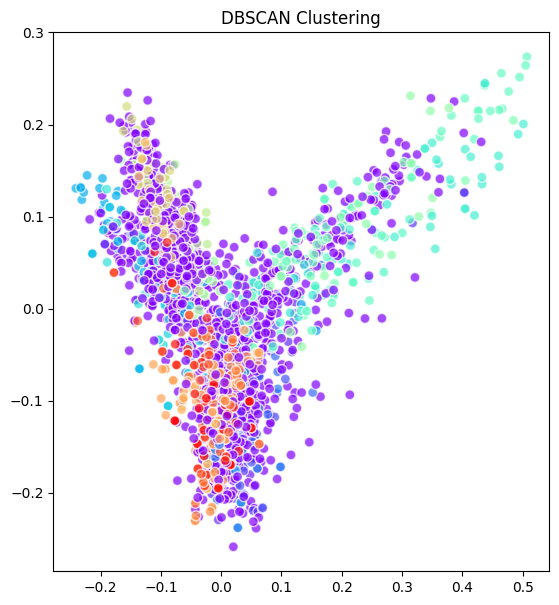

In [595]:
#
# 2. Scatterplot the dbscan model after dimensionality reduction (PCA)
#

plt.figure().set_figwidth(10)
plt.figure().set_figheight(7)
plt.scatter(PCA_reduction[:,0], PCA_reduction[:,1], c=dbscan_clusters.labels_, cmap='rainbow', alpha=0.7, edgecolors='w', s=50)
plt.title("DBSCAN Clustering")
plt.show()

In [596]:
#
# 3. Show the count of the found noise and then compare the amount of clusters produced to the other methods 
#

#print(dbscan_clusters.labels_)
list_of_labels = list(dbscan_clusters.labels_)
num_noise_pts = list_of_labels.count(-1)
label_count = len(set(dbscan_clusters.labels_))
num_clusters = label_count - (1 if -1 in dbscan_clusters.labels_ else 0)


print("Number of noise points: {}".format(num_noise_pts))
print("Number of clusters produced: {}".format(num_clusters))

Number of noise points: 1265
Number of clusters produced: 318


It seems that DBSCAN produces a very large number of clusters (318) and labeling many of the points as noise (1265). Comparing that to the rest of the methods, it is possible that either my implementation is incorrect, or, DBSCAN does not perform well on this dataset. 

##### Gaussian Mixture Model (GMM): #####

In [597]:
#
# Create GMM clusters with 5 clusters
#

gmm_clusters = skm.GaussianMixture(n_components = 5, random_state=0)
gmm_clusters = gmm_clusters.fit(features.values)


#
# 1. Report number of articles in each of the clusters
#

#print(gmm_clusters)
feature_labels = gmm_clusters.predict(features.values)
num_of_articles_gmm = col.Counter(feature_labels)

for cluster in num_of_articles_gmm.items():
    print("Cluster #: {} || Number of Articles: {}".format(cluster[0], cluster[1]))


Cluster #: 1 || Number of Articles: 799
Cluster #: 3 || Number of Articles: 353
Cluster #: 0 || Number of Articles: 191
Cluster #: 4 || Number of Articles: 364
Cluster #: 2 || Number of Articles: 518


<Figure size 1000x480 with 0 Axes>

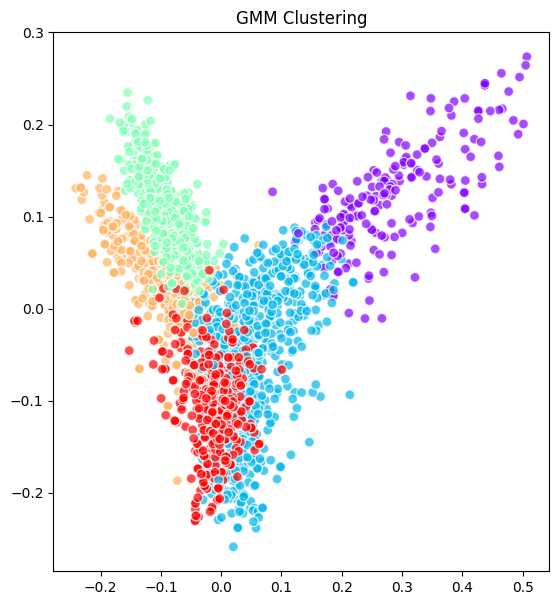

In [598]:
#
# 2. Scatterplot the gmm model after dimensionality reduction (PCA)
#

plt.figure().set_figwidth(10)
plt.figure().set_figheight(7)
plt.scatter(PCA_reduction[:,0], PCA_reduction[:,1], c=feature_labels, cmap='rainbow', alpha=0.7, edgecolors='w', s=50)
plt.title("GMM Clustering")
plt.show()


##### Agglomerative: #####

In [599]:
#
# Create Agglomerative clusters aiming to form 5 clusters
#

agglomerative_clusters = sk.cluster.AgglomerativeClustering(n_clusters = 5)
agglomerative_clusters = agglomerative_clusters.fit(features)


#
# 1. Report number of articles in each of the clusters
#

num_of_articles_agglomerative = col.Counter(agglomerative_clusters.labels_)

for cluster in num_of_articles_agglomerative.items():
    print("Cluster #: {} || Number of Articles: {}".format(cluster[0], cluster[1]))

Cluster #: 0 || Number of Articles: 859
Cluster #: 3 || Number of Articles: 351
Cluster #: 2 || Number of Articles: 175
Cluster #: 4 || Number of Articles: 354
Cluster #: 1 || Number of Articles: 486


<Figure size 1000x480 with 0 Axes>

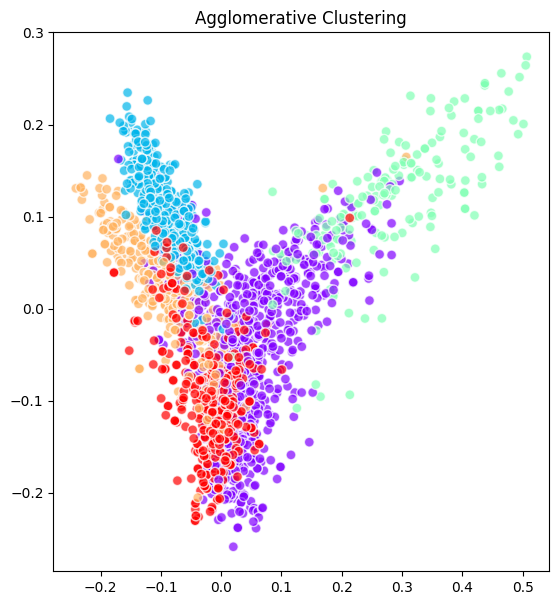

In [600]:
#
# 2. Scatterplot the agglomerative model after dimensionality reduction (PCA)
#

plt.figure().set_figwidth(10)
plt.figure().set_figheight(7)
plt.scatter(PCA_reduction[:,0], PCA_reduction[:,1], c=agglomerative_clusters.labels_, cmap='rainbow', alpha=0.7, edgecolors='w', s=50)
plt.title("Agglomerative Clustering")
plt.show()
